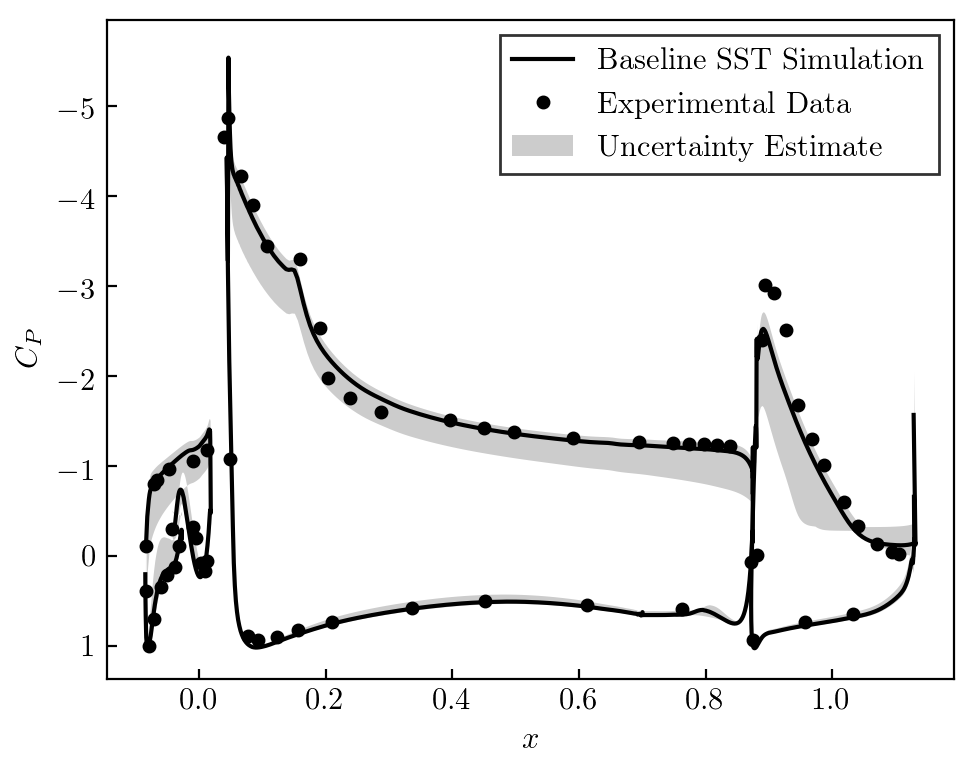

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

folders= ["5p5aoa"]
parts = ['slat','main','flap']

plt.style.use('article')
plt.rcParams['font.family']='serif'
matplotlib.rc('text',usetex=True)

file_loc = '/home/jmukho/phd/phd_thesis/code/image_gen/30p30n/data/'
exp_cp_data = {}
            
for folder in folders:
    exp_cp_data[folder] = {}
    plt.figure(figsize=(5,4))
    for part in parts:
        fn = file_loc + '{}_{}_exp_cp.csv'.format(folder,part)
        with open(fn) as f:
            header = f.readline()
        header = [h.strip() for h in header.split(',')]
        dtype=[]
        for var in header:
            dtype.append((var,np.float64))
        exp_cp_data[folder][part] = np.loadtxt(fn, dtype= dtype, comments='#', skiprows=1,delimiter=',')
        

        fn = file_loc + '{}_{}_cp.csv'.format(folder,part)
        with open(fn) as f:
            header = f.readline()
        header = [h.strip() for h in header.split(',')]
        dtype=[]
        for var in header:
            dtype.append((var,np.float64))
        data = np.loadtxt(fn, dtype= dtype, comments='#', skiprows=1,delimiter=',')
        if part == 'slat':
            plt.plot(data['X'],data['Baseline'],color='black', label="Baseline SST Simulation")

            plt.plot(exp_cp_data[folder][part]['X'],exp_cp_data[folder][part]['Pressure_Coefficient'],
                     marker='o',lw=0.0,color="black", label="Experimental Data")
            plt.fill_between(data['X'],data['Max'],data['Min'],alpha=0.2,
                             color='black',lw=0,label="Uncertainty Estimate")
        else:
            plt.plot(data['X'],data['Baseline'],color='black')

            plt.plot(exp_cp_data[folder][part]['X'],exp_cp_data[folder][part]['Pressure_Coefficient'],
                     marker='o',lw=0.0,color="black")
            plt.fill_between(data['X'],data['Max'],data['Min'],alpha=0.2,
                             color='black',lw=0)
        plt.xlabel(r'$x$')
        plt.ylabel(r'$C_P$')
        plt.legend(frameon=True,framealpha=0.8,edgecolor='0.0',fancybox=False)
        plt.tick_params(direction='in')
        plt.gca().invert_yaxis()
        plt.tight_layout()
    image_loc = '/home/jmukho/phd/phd_thesis/code/image_gen/30p30n/images/30p30n_{}_cp.png'.format(folder)
    plt.savefig(image_loc)
